In [125]:
%run load_names.ipynb
%run features.ipynb

In [126]:
from matplotlib import pyplot as plt

In [127]:
names = load_firstnames()
males = count_male(names)
females = count_female(names)

In [128]:
def draw_bar_for_feature(feature_rule, names, title):
    xaxis = []

    for name in names:
        count = feature_rule(name[0])
        if count not in xaxis:
            xaxis.append(count)

    xaxis.sort()
    male = [0] * len(xaxis)
    female = [0] * len(xaxis)

    for name in names:
        count = feature_rule(name[0])
        index = xaxis.index(count)
        if is_female(name[1]):
            female[index] = female[index] + 1
        else:
            male[index] = male[index] + 1

    plt.bar(xaxis, male, align='center')
    limit = max(max(female), max(male)) + 200
    plt.ylim(0, limit)
    plt.title(title + ' for male names')
    plt.show()
    
    for i in range(len(xaxis)):
        percentage = (male[i] * 100) / males
        print("occurence: {} percentage: {}".format(xaxis[i], percentage))
    
    plt.bar(xaxis, female, align='center')
    plt.ylim(0, limit)
    plt.title(title + ' for female names')
    plt.show()
    
    for i in range(len(xaxis)):
        percentage = (female[i] * 100) / females
        print("occurence: {} percentage: {}".format(xaxis[i], percentage))
        
    print() 

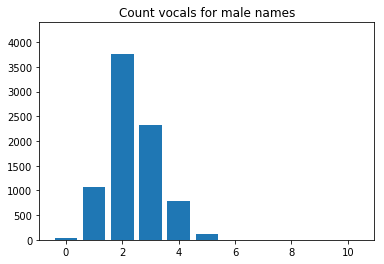

occurence: 0 percentage: 0.35784797630799603
occurence: 1 percentage: 13.166337611056269
occurence: 2 percentage: 46.372161895360314
occurence: 3 percentage: 28.788252714708786
occurence: 4 percentage: 9.76061204343534
occurence: 5 percentage: 1.4807502467917077
occurence: 6 percentage: 0.07403751233958539
occurence: 7 percentage: 0.0
occurence: 8 percentage: 0.0
occurence: 10 percentage: 0.0


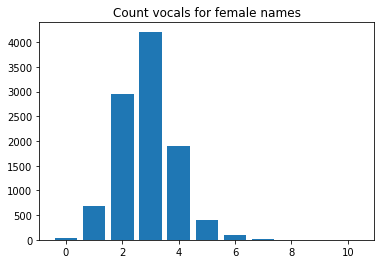

occurence: 0 percentage: 0.27274498344048315
occurence: 1 percentage: 6.614065848431716
occurence: 2 percentage: 28.803818429768167
occurence: 3 percentage: 40.94097019286966
occurence: 4 percentage: 18.468731735827003
occurence: 5 percentage: 3.8281706604324954
occurence: 6 percentage: 0.8571985193843756
occurence: 7 percentage: 0.1655951685174362
occurence: 8 percentage: 0.03896356906292616
occurence: 10 percentage: 0.00974089226573154



In [129]:
draw_bar_for_feature(count_vocal, names, "Count vocals")

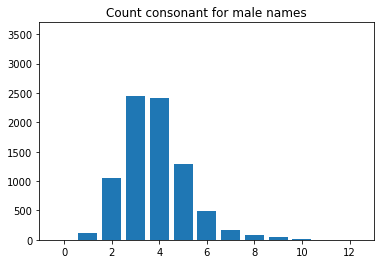

occurence: 0 percentage: 0.0
occurence: 1 percentage: 1.3573543928923988
occurence: 2 percentage: 12.919545903257651
occurence: 3 percentage: 30.24432379072063
occurence: 4 percentage: 29.750740375123396
occurence: 5 percentage: 15.967423494570582
occurence: 6 percentage: 6.108094768015794
occurence: 7 percentage: 2.023692003948667
occurence: 8 percentage: 0.9624876604146101
occurence: 9 percentage: 0.5059230009871668
occurence: 10 percentage: 0.1357354392892399
occurence: 11 percentage: 0.012339585389930898
occurence: 12 percentage: 0.012339585389930898


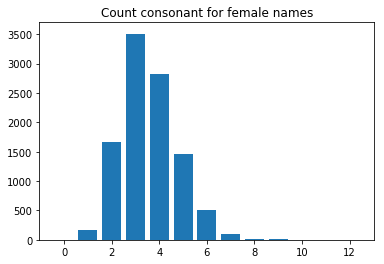

occurence: 0 percentage: 0.01948178453146308
occurence: 1 percentage: 1.6072472238457043
occurence: 2 percentage: 16.218585622443015
occurence: 3 percentage: 34.10286382232613
occurence: 4 percentage: 27.55698421975453
occurence: 5 percentage: 14.16325735437366
occurence: 6 percentage: 5.006818624586012
occurence: 7 percentage: 1.0227936879018118
occurence: 8 percentage: 0.20455873758036236
occurence: 9 percentage: 0.06818624586012079
occurence: 10 percentage: 0.01948178453146308
occurence: 11 percentage: 0.00974089226573154
occurence: 12 percentage: 0.0



In [130]:
draw_bar_for_feature(count_consonant, names, "Count consonant")

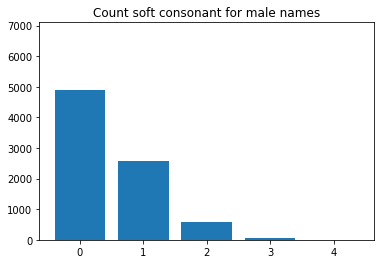

occurence: 0 percentage: 60.377591312931884
occurence: 1 percentage: 31.675715695952615
occurence: 2 percentage: 7.329713721618954
occurence: 3 percentage: 0.6046396841066141
occurence: 4 percentage: 0.012339585389930898


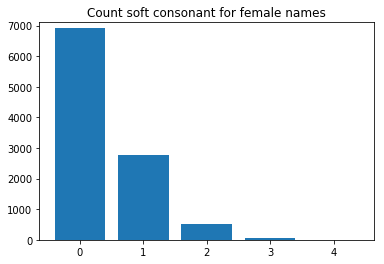

occurence: 0 percentage: 67.25112020261057
occurence: 1 percentage: 27.099162283265148
occurence: 2 percentage: 5.152932008571986
occurence: 3 percentage: 0.4967855055523086
occurence: 4 percentage: 0.0



In [131]:
draw_bar_for_feature(count_soft_consonant, names, "Count soft consonant")

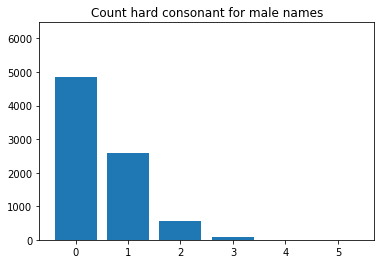

occurence: 0 percentage: 59.77295162882527
occurence: 1 percentage: 31.98420533070089
occurence: 2 percentage: 7.095261599210266
occurence: 3 percentage: 1.1105626850937809
occurence: 4 percentage: 0.037018756169792694
occurence: 5 percentage: 0.0


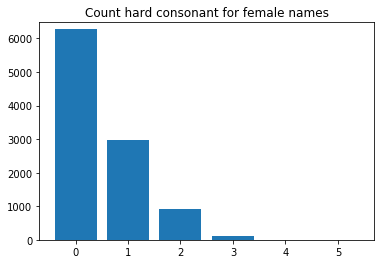

occurence: 0 percentage: 61.172803428794076
occurence: 1 percentage: 28.94019092148841
occurence: 2 percentage: 8.883693746347165
occurence: 3 percentage: 0.9838301188388856
occurence: 4 percentage: 0.00974089226573154
occurence: 5 percentage: 0.00974089226573154



In [132]:
draw_bar_for_feature(count_hard_consonant, names, "Count hard consonant")

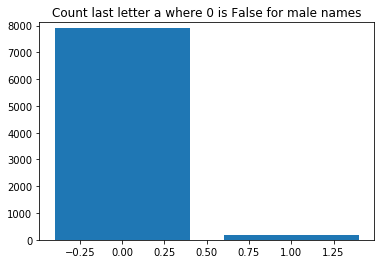

occurence: False percentage: 97.75419545903257
occurence: True percentage: 2.2458045409674234


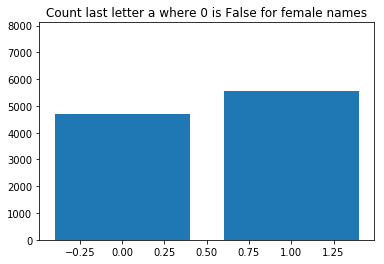

occurence: False percentage: 45.879602571595555
occurence: True percentage: 54.120397428404445



In [133]:
draw_bar_for_feature(last_letter_a, names, "Count last letter a where 0 is False")

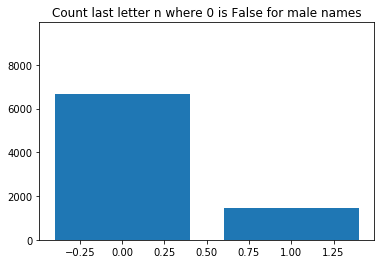

occurence: False percentage: 82.14461994076999
occurence: True percentage: 17.85538005923001


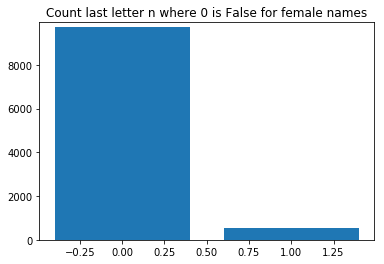

occurence: False percentage: 94.9055133450224
occurence: True percentage: 5.094486654977596



In [134]:
draw_bar_for_feature(last_letter_n, names, "Count last letter n where 0 is False")

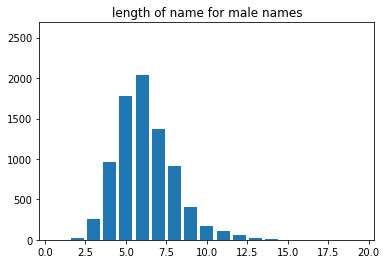

occurence: 1 percentage: 0.0
occurence: 2 percentage: 0.24679170779861798
occurence: 3 percentage: 3.1342546890424483
occurence: 4 percentage: 11.833662388943731
occurence: 5 percentage: 21.964461994077
occurence: 6 percentage: 25.12339585389931
occurence: 7 percentage: 16.966929911154985
occurence: 8 percentage: 11.229022704837117
occurence: 9 percentage: 4.94817374136229
occurence: 10 percentage: 2.06071076011846
occurence: 11 percentage: 1.345014807502468
occurence: 12 percentage: 0.8020730503455084
occurence: 13 percentage: 0.23445212240868707
occurence: 14 percentage: 0.07403751233958539
occurence: 15 percentage: 0.012339585389930898
occurence: 16 percentage: 0.0
occurence: 17 percentage: 0.024679170779861797
occurence: 19 percentage: 0.0


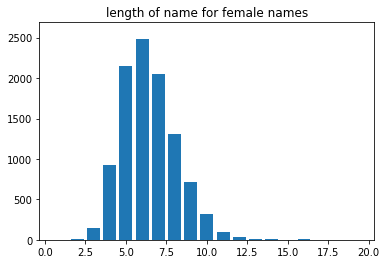

occurence: 1 percentage: 0.00974089226573154
occurence: 2 percentage: 0.06818624586012079
occurence: 3 percentage: 1.402688486265342
occurence: 4 percentage: 9.029807130333138
occurence: 5 percentage: 20.99162283265147
occurence: 6 percentage: 24.245080849405806
occurence: 7 percentage: 19.920124683421
occurence: 8 percentage: 12.741087083576856
occurence: 9 percentage: 6.954997077732321
occurence: 10 percentage: 3.117085525034093
occurence: 11 percentage: 0.9156438729787648
occurence: 12 percentage: 0.3701539060977986
occurence: 13 percentage: 0.08766803039158387
occurence: 14 percentage: 0.07792713812585232
occurence: 15 percentage: 0.00974089226573154
occurence: 16 percentage: 0.03896356906292616
occurence: 17 percentage: 0.0
occurence: 19 percentage: 0.01948178453146308



In [135]:
draw_bar_for_feature(lambda x : len(x), names, "length of name")